In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
x_df=pd.DataFrame(datasets.load_boston()['data'],columns=datasets.load_boston()['feature_names']) #X
y_df=pd.DataFrame(datasets.load_boston()['target'],columns=['y']) #Y
df=x_df.join(y_df)

In [2]:
df.describe()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
#画出RM,DIS,PTRATIO,LSTAT与y的散点图,分析特征与y是否有线性关系?
x1 = df['RM'].values
x2 = df['DIS'].values
x3 = df['PTRATIO'].values
x4 = df['LSTAT'].values
y = df['y'].values

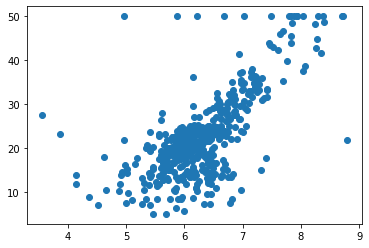

In [4]:
import matplotlib.pyplot as plt
#RM与y的散点图
plt.scatter(x1,y)
plt.show()
#特征与y具有线性关系

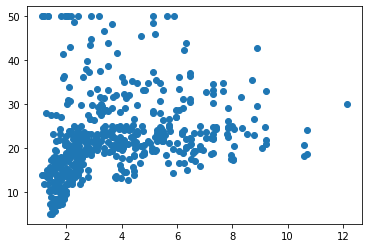

In [5]:
#DIS与y的散点图
plt.scatter(x2,y)
#特征与y具有线性关系

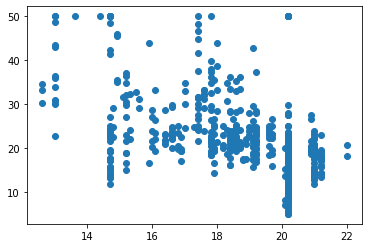

In [6]:
#PTRATIO与y的散点图
plt.scatter(x3,y)
#具有线性关系

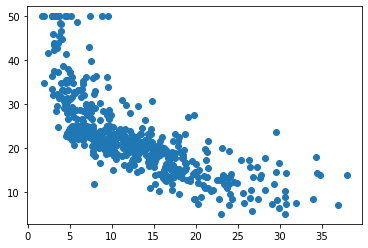

In [7]:
#LSTAT与y的散点图
plt.scatter(x4,y)
#具有线性关系

In [8]:
df.corr()['y']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
y          1.000000
Name: y, dtype: float64

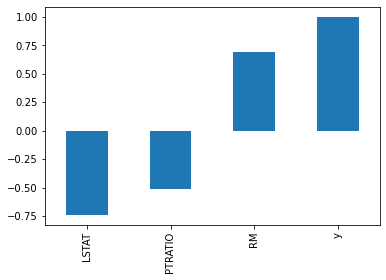

In [9]:
corr = df.corr()
corr = corr['y']
corr[abs(corr)>0.5].sort_values().plot.bar()

In [10]:
# 制作训练集和测试集的数据
from sklearn.model_selection import train_test_split
df =df[['LSTAT','PTRATIO','RM','DIS','y']]
y = np.array(df['y'])
df=df.drop(['y'],axis=1)
X = np.array(df)
# 分割训练集和测试集
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print(train_X.shape,train_Y.shape)

print(test_X.shape)

(404, 4) (404,)
(102, 4)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
# 加载模型
linreg = LinearRegression()
# 拟合数据
linreg.fit(train_X,train_Y)
# 进行预测
y_predict = linreg.predict(test_X)
# 计算均方差
metrics.mean_squared_error(y_predict,test_Y)

18.665882143804257

In [12]:
#对某新小区,其RM=8,DIS=2,PTRATIO=12,LSTAT=22,预测该小区房价
test_X = [22,12,8,2]
test_X = np.asarray(test_X)
print(test_X.shape)

(4,)


In [13]:
test_X = test_X.reshape(1,-1)
print(test_X.shape)

(1, 4)


In [14]:
yp = linreg.predict(test_X)

In [15]:
print(yp)

[30.26628368]
